In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [50]:
data = pd.read_csv(r"C:\Users\sowba\OneDrive\Documents\pyhton project\IMDb Movies India.csv", encoding='latin-1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [30]:
data.shape
data.isna().sum()
data.duplicated().sum()
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.info()
data.shape
# Clean 'Year' column: remove parentheses and convert to numeric
data['Year'] = pd.to_numeric(data['Year'].astype(str).str.replace(r'\(|\)', '', regex=True), errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64
              Year       Rating
count  5659.000000  5659.000000
mean   1996.247570     5.898533
std      19.741839     1.381165
min    1931.000000     1.100000
25%    1983.000000     5.000000
50%    2002.000000     6.100000
75%    2013.000000     6.900000
max    2021.000000    10.000000


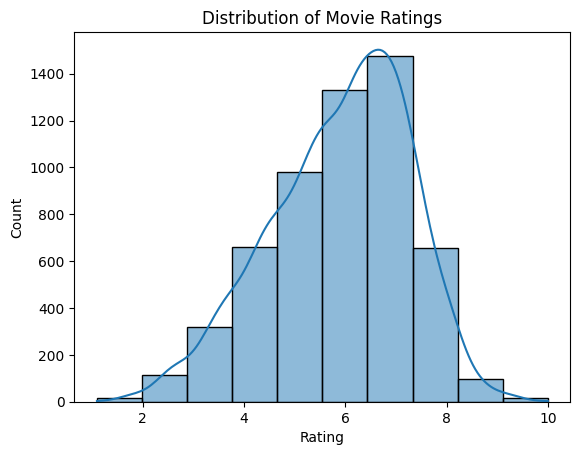

In [31]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Visualize the distribution of ratings
sns.histplot(data['Rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.show()



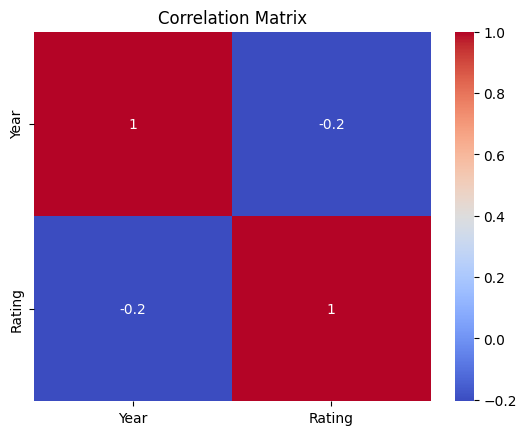

In [32]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_data.corr()

# Visualize the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [33]:
# Remove commas from the 'Votes' column and convert to numeric
data['Votes'] = data['Votes'].str.replace(',', '')
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

# Now apply the imputer for missing values
imputer = SimpleImputer(strategy='mean')
data['Rating'] = imputer.fit_transform(data[['Rating']])
data['Votes'] = imputer.fit_transform(data[['Votes']])

# Fill missing values in categorical columns with 'Unknown'
data.fillna('Unknown', inplace=True)

# Verify changes
print(data.head())


                                 Name  Year Duration  \
1  #Gadhvi (He thought he was Gandhi)  2019  109 min   
3                             #Yaaram  2019  110 min   
5                ...Aur Pyaar Ho Gaya  1997  147 min   
6                           ...Yahaan  2005  142 min   
8                  ?: A Question Mark  2012   82 min   

                       Genre  Rating   Votes        Director          Actor 1  \
1                      Drama     7.0     8.0   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     4.4    35.0      Ovais Khan          Prateik   
5     Comedy, Drama, Musical     4.7   827.0    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War     7.4  1086.0  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller     5.6   326.0   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  
1          Vivek Ghamande    Arvind Jangid  
3              Ishita Raj  Siddhant Kapoor  
5  Aishwarya Rai Bachchan    Shammi Kapoo

In [34]:
# Convert 'Year' column to integer, filling NaN with 0 or dropping NaN rows if needed
data['Year'] = data['Year'].fillna(0).astype(int)  # or use .dropna() if you want to remove those rows

# Clean 'Duration' and 'Votes' columns
data['Duration'] = pd.to_numeric(data['Duration'].astype(str).str.replace(' min', ''), errors='coerce')
data['Votes'] = pd.to_numeric(data['Votes'].astype(str).str.replace(',', ''), errors='coerce')

# Check the cleaned data
data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [35]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Ensure all values in 'Votes' are strings, handling missing values
data['Votes'] = data['Votes'].fillna('0').astype(str)

# Clean 'Votes' column by removing commas and converting to numeric
data['Votes'] = data['Votes'].str.replace(',', '').astype(float)

# Fill missing values in 'Rating' and 'Votes' with their mean
imputer = SimpleImputer(strategy='mean')
data['Rating'] = imputer.fit_transform(data[['Rating']])
data['Votes'] = imputer.fit_transform(data[['Votes']])

# Fill missing values in categorical columns with 'Unknown'
data.fillna('Unknown', inplace=True)

# Convert 'Year' to string, extract numeric part, and convert to float
data['Year'] = data['Year'].astype(str).str.extract('(\d+)')[0].astype(float)

# Convert 'Duration' to string, remove ' min', and convert to float
data['Duration'] = data['Duration'].astype(str).str.replace(' min', '').astype(float)

# One-Hot Encode the 'Genre' column
data = pd.get_dummies(data, columns=['Genre'])

# Label Encode the 'Director', 'Actor 1', 'Actor 2', 'Actor 3'
label_encoders = {}
for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Drop the 'Name' column (not useful for prediction)
data.drop(columns=['Name'], inplace=True)

# Check the cleaned data
print(data.head())



     Year  Duration  Rating   Votes  Director  Actor 1  Actor 2  Actor 3  \
1  2019.0     109.0     7.0     8.0       629     1352     2272      319   
3  2019.0     110.0     4.4    35.0      1335     1198      719     2148   
5  1997.0     147.0     4.7   827.0      1530      378       75     2045   
6  2005.0     142.0     7.4  1086.0      2044      692     1112     2524   
8  2012.0      82.0     5.6   326.0       135     1934     1175     1013   

   Genre_Action  Genre_Action, Adventure  ...  \
1         False                    False  ...   
3         False                    False  ...   
5         False                    False  ...   
6         False                    False  ...   
8         False                    False  ...   

   Genre_Romance, Thriller, Mystery  Genre_Sci-Fi  Genre_Sci-Fi, Thriller  \
1                             False         False                   False   
3                             False         False                   False   
5                

In [36]:
# Then proceed with outlier removal
Q1 = data['Rating'].quantile(0.25)
Q3 = data['Rating'].quantile(0.75)
IQR = Q3 - Q1

In [37]:
# Remove outliers using IQR method for the 'Rating' column
Q1 = data['Rating'].quantile(0.25)
Q3 = data['Rating'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Rating'] >= (Q1 - 1.5 * IQR)) & (data['Rating'] <= (Q3 + 1.5 * IQR))]


In [38]:
# Create bins for 'Rating' (e.g., low, medium, high)
bins = [0, 5, 7, 10]
labels = ['Low', 'Medium', 'High']
data['Rating Category'] = pd.cut(data['Rating'], bins=bins, labels=labels)


In [39]:
# Define features (X) and target (y)
X = data.drop(columns=['Rating'])
y = data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
data = pd.read_csv(r"C:\Users\sowba\OneDrive\Documents\pyhton project\IMDb Movies India.csv", encoding='latin-1')

# Drop the 'Name' column if it's not needed
data = data.drop('Name', axis=1)

# Check for NaN values in the target variable
target_column = 'Rating'  # Replace with your actual target column name
print(data[target_column].isnull().sum())

# Drop rows with missing target values
data = data[data[target_column].notnull()]

# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Define your features (X) and target (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


7590
Mean Squared Error: 13.214636824059662
R^2 Score: -6.10791026218242


In [42]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")


Mean Squared Error: 13.214636824059662
R-Squared: -6.10791026218242


Mean Squared Error: 13.214636824059662
R-Squared: -6.10791026218242


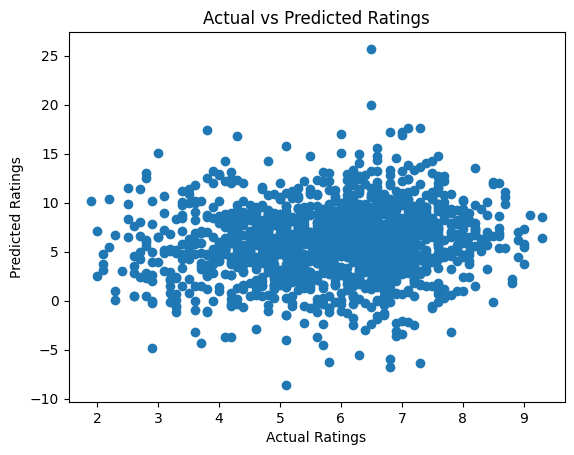

In [43]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

# Plot predicted vs actual ratings
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()


In [46]:
# Get coefficients from the linear regression model
coefficients = model.coef_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort by absolute value of coefficients
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print feature ranking
print("Feature ranking:")
for i, row in importance_df.iterrows():
    print(f"{i + 1}. Feature {row['Feature']} ({row['Coefficient']})")


Feature ranking:
6487. Feature Actor 1_Dev Kumar (-13.715705917601683)
666. Feature Genre_Musical, Thriller (13.154984337930168)
276. Feature Genre_Action, Adventure, History (12.124194650729361)
11279. Feature Actor 2_Zeb Rehman (11.765622769613895)
763. Feature Votes_1,146 (11.665607826886841)
13574. Feature Actor 3_Salim Khan (-11.070391642176105)
11150. Feature Actor 2_Veeni Paranjape Joglekar (10.601763846873697)
11524. Feature Actor 3_Anant Nag (-10.593750275346574)
12745. Feature Actor 3_Meenaxi (-10.236855121358735)
5784. Feature Director_Vinod Mehra (-10.066114092913487)
1819. Feature Votes_315 (9.766972259193283)
6402. Feature Actor 1_Chandrashekhar (-9.692812163617928)
1500. Feature Votes_200 (-9.665777998611382)
4055. Feature Director_Krishna Ghattamaneni (-9.531122566145893)
4024. Feature Director_Kiran Kumar (-9.34636277380629)
2125. Feature Votes_5,170 (9.310424313813819)
13781. Feature Actor 3_Sheetal (-9.237463311247756)
10724. Feature Actor 2_Sharada (-9.2364428545345

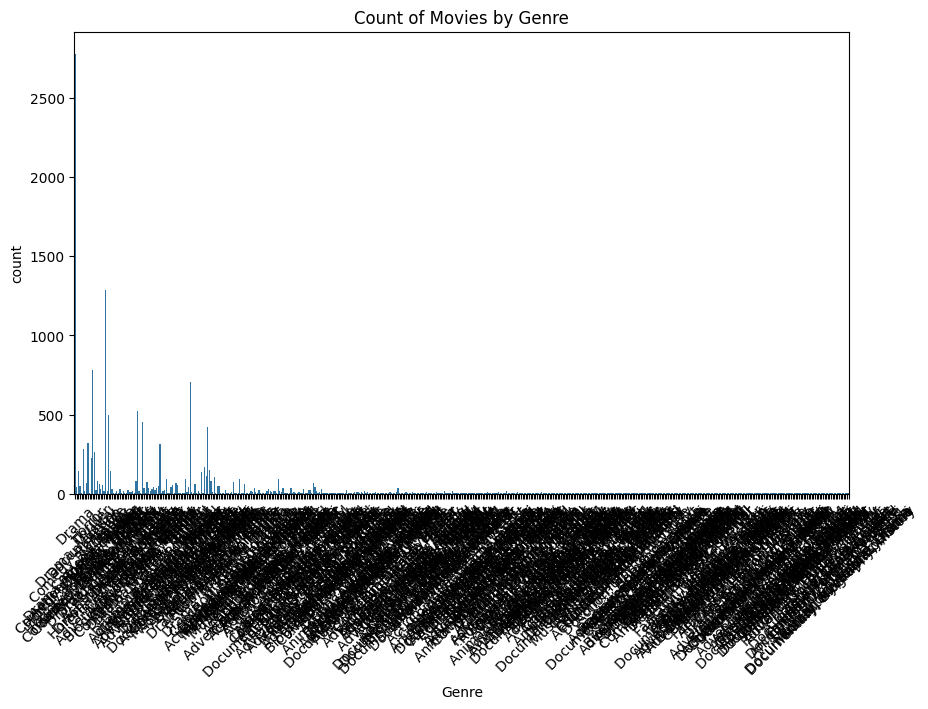

In [51]:
# 1. Bar Graph

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Genre')
plt.title('Count of Movies by Genre')
plt.xticks(rotation=45)
plt.show()


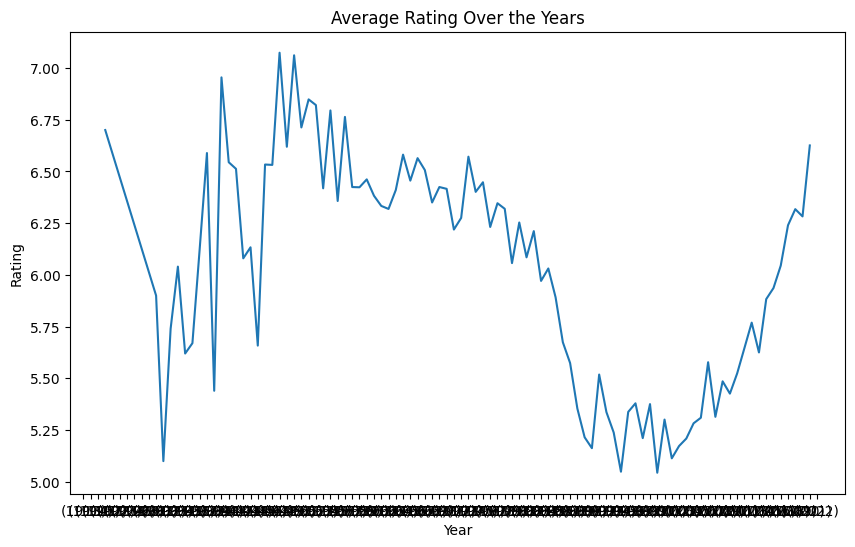

In [52]:
avg_rating_per_year = data.groupby('Year')['Rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_rating_per_year, x='Year', y='Rating')
plt.title('Average Rating Over the Years')
plt.show()


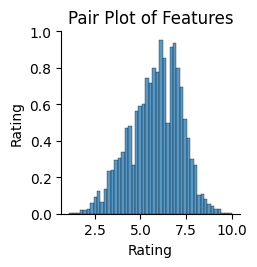

In [53]:
sns.pairplot(data)
plt.title('Pair Plot of Features')
plt.show()

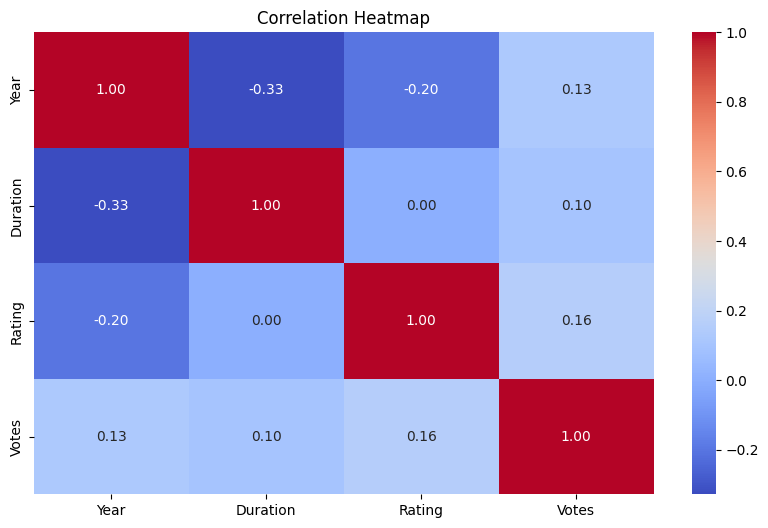

In [15]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
